In [2]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

# Homework 2 - Polynomial Overfitting, Trees, and Random Forests

(Much of this is taken from Rebecca Willett's machine learning course.)

## Exercise 2.16 - Investigating Overfitting with Polynomial Regression

The goal of this exercise is to investigate overfitting in polynomial regression. First, we generate a synthetic dataset.

In [3]:
def data_generator(n_samples ):
    x = np.random.uniform(-10, 10, n_samples)
    y = np.cos (0.5 + np.exp(-x)) + 1/(1 + np.exp(-x))
    noise = np.random.normal(0, 0.01,  n_samples)
    y += noise
    return x, y

complete_X , complete_Y = data_generator(5000)
train_X , train_Y = complete_X[:100], complete_Y[:100]
large_X , large_Y = complete_X[100:], complete_Y [100:]

loss_func = mean_squared_error

We will use `train_X` and `train_Y` as training samples for ERM, and `large_X` and `large_Y` as approximations to the true distribution of $X$ and $Y$ to estimate the true risk. Let's plot the small portion to see what our data looks like:

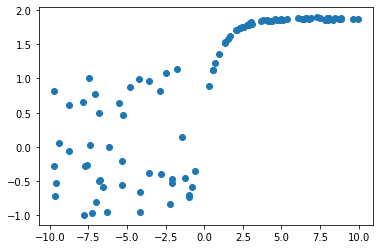

In [4]:
plt.scatter(train_X,train_Y)

### (a) Compute polynomials of best fit

The below function `best_poly` takes in a collection of $X$ values `X`, a collection of $Y$ values `Y`, and a degree `k`, and computes the polynomial $p_k$ of degree $k$ that best fits the data, as well as the mean square error of the best polynomial approximation of the data. Fill out this function. (Hint: you can use `np.polyfit`; you will need to set the optional parameter `full` to `True`.)


In [5]:
def best_poly(X, Y, k):
    '''
    Compute the best fit polynomial to (X,Y) of degree k
    and the mean squared error.
    Inputs:
        X: a numpy array of the dependent variables
        Y: a numpy array of the independent variables
        k: the degree of the fitted polynomial
    Outputs: 
        p: the coefficients of the best fit polynomial, 
            in decreasing order of power
        mse: the mean squared error
    '''
    
    p = np.polyfit(X, Y, k)
    predict_Y = np.polyval(p, X)
    
    # Mean squared error or MSE, measures the average squared distance between two sets of values. 
    '''
    diff_Y = np.subtract(Y, predict_Y)
    squared = np.square(diff_Y)
    mse = squared.mean()
    '''
    mse = loss_func(Y, predict_Y)

    return p, mse

### (b) Plot polynomials and data

Fill out the function `plot_poly_with_data`, which plots the polynomial you predicted in part (a) and the data points `train_X`, `train_Y` in the same plot. Use different colors so that you can distinguish between the two more easily. To plot a polynomial, you can generate an array of $x$ values for points on the polynomial using `np.linspace`, and the $y$ values for points on the polynomial using the coefficients you got in part (a). Display your plots for $k = 1, 2, 3, 10, 20, 30$, and title your plots appropriately. What do you observe?

In [6]:
def plot_poly_with_data(X, Y, k, plot_title):
    '''
    Plot the best fit polynomial to X, Y of degree k,
    as well as the points X and Y
    Inputs:
        X: a numpy array of the dependent variables
        Y: a numpy array of the independent variables
        k: the degree of the fitted polynomial
        plot_title: title of your plot, supplied as a string
    Outputs:
        Nothing, just display the plot.
    '''
    p, _ = best_poly(X,Y,k) # compute the coefficients for the best polynomial
    predict_Y = np.polyval(p, X)

    plt.clf()
    plt.scatter(X,Y)
    plt.scatter(X, predict_Y, alpha=0.5)
    plt.title(plot_title)
    
    plt.show()

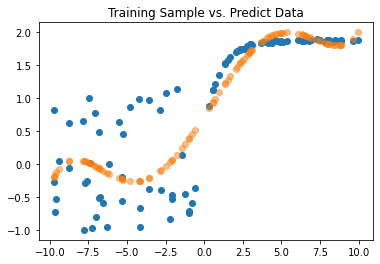

In [7]:
plot_poly_with_data(train_X, train_Y, 5, "Training Sample vs. Predict Data")

### (c) Plot MSE versus degree

For $k = 0, 1, 2, \dots, 30$, compute the MSE of your predictor $p_k$ versus $k$ and plot MSE versus $k$. What do you observe?

In [8]:
import pandas as pd

column_names = ['k', 'MSE']
df = pd.DataFrame(columns = column_names)

for k in range(1, 31):
    p, mse = best_poly(train_X, train_Y, k)
    
    df.loc[len(df.index)] = [k, mse]
    
print(df)

       k       MSE
0    1.0  0.366246
1    2.0  0.365486
2    3.0  0.282183
3    4.0  0.278774
4    5.0  0.252410
5    6.0  0.249645
6    7.0  0.237892
7    8.0  0.231757
8    9.0  0.213305
9   10.0  0.211950
10  11.0  0.198851
11  12.0  0.198170
12  13.0  0.196649
13  14.0  0.195840
14  15.0  0.189481
15  16.0  0.189480
16  17.0  0.187693
17  18.0  0.186288
18  19.0  0.174123
19  20.0  0.171755
20  21.0  0.170809
21  22.0  0.170262
22  23.0  0.170103
23  24.0  0.170043
24  25.0  0.169970
25  26.0  0.168831
26  27.0  0.167679
27  28.0  0.167472
28  29.0  0.166253
29  30.0  0.166122


### (d) Investigating testing error

Using `large_X` and `large_Y` as test data, compute the MSE of the polynomials *trained on `train_X` and `train_Y`* on the testing set. Plot your results for $k = 0, 1, 2, \dots, 30$. What does the shape look like?

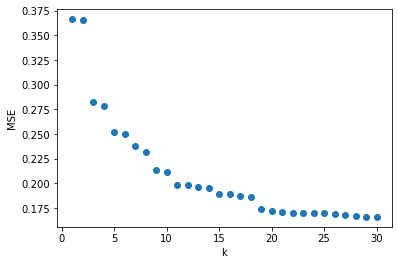

In [9]:
plt.clf()
plt.scatter(df.k, df.MSE)
plt.xlabel('k')
plt.ylabel('MSE')

plt.show()

## Exercise 3.10: Random trees and forests

In this exercise, we will try to classify images of breast cancer cells as malignant or benign using decision tree and random forest methods. The dataset includes various features of images of cell nuclei, such as their perimeter, symmetry, etc. For our purposes, we will only use the first two features for each cell: their radius and texture. First we load and plot the data.

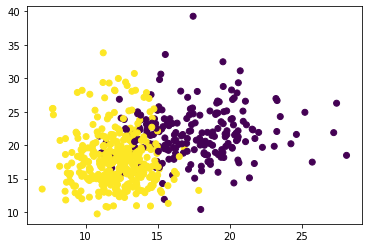

In [10]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True) # X denotes features, y denotes labels
# a y value of 1 means the cell is benign
X = X[:, :2]

plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Part (a): Unregularized tree

Split the data 25%-75% into testing and training data. Train a decision tree, with Gini impurity as the split criterion, without any regularization on the training data, then report the accuracy of this tree on the training and testing data. You can use `sklearn.model_selection.train_test_split` to split the data, and `sklearn.tree.DecisionTreeClassifier` for training the tree. You can also use `sklearn.metrics.accuracy_score` to evaluate the accuracy of your model. You might also be interested in using the `plot_tree` function to visualize your decision tree.

Hint: read the following two pages carefully: 
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://scikit-learn.org/stable/modules/tree.html#tree

Your code shouldn't be longer than around 20 lines.

Accuracy of training data: 1.0
Accuracy of testing data: 0.8671328671328671


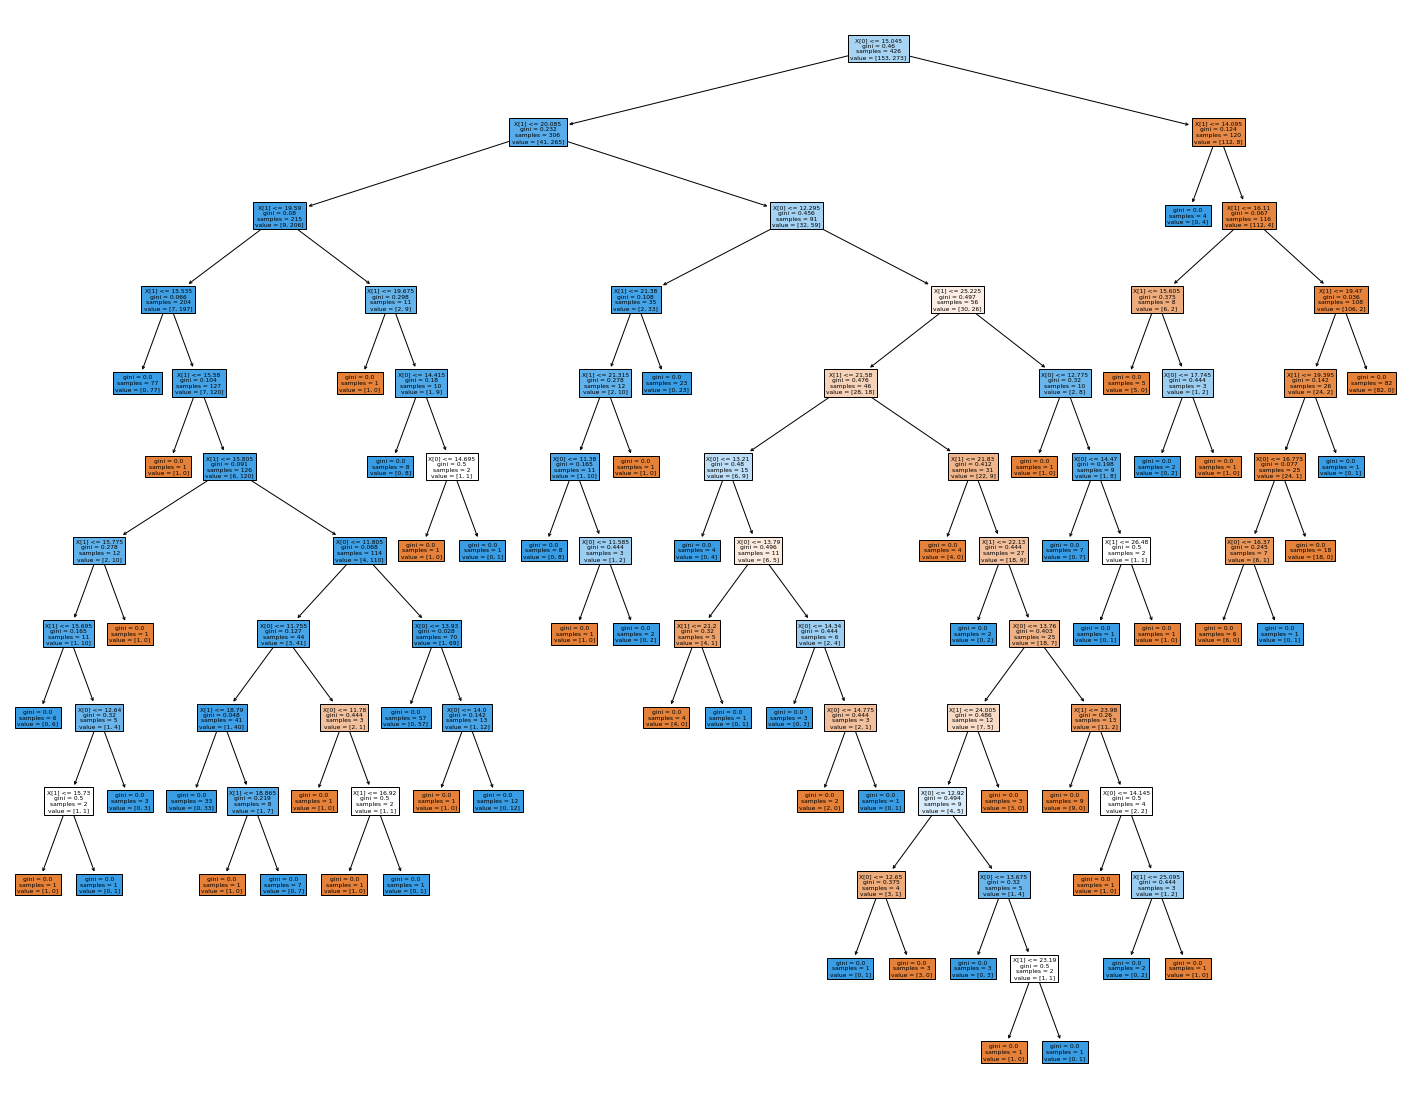

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

# Split the data 25%-75% into testing and training data. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25, shuffle=True)

# Train a decision tree, with Gini impurity as the split criterion
clf_unregularized = tree.DecisionTreeClassifier(criterion="gini")
clf_unregularized = clf_unregularized.fit(X_train, y_train)

# Report the accuracy of this tree on the training and testing data
y_train_pred = clf_unregularized.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
print("Accuracy of training data:", acc_train)

y_test_pred = clf_unregularized.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print("Accuracy of testing data:", acc_test)


## https://mljar.com/blog/visualize-decision-tree/
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_unregularized, filled=True)
#fig.savefig("decistion_tree.png")


### Part(b): Regularized tree

Now try regularizing your tree by setting `max_depth` in `DecisionTreeClassifier` to various values. Play around a bit! What values give you the best training error? What values give you the best testing error? Make some plots of `max_depth` versus training and testing error. What are your findings? How can you explain these findings?

    max_depth  train_error  test_error  accuracy
0         1.0     0.115023    0.090909  0.909091
1         2.0     0.105634    0.097902  0.902098
2         3.0     0.096244    0.139860  0.860140
3         4.0     0.077465    0.132867  0.867133
4         5.0     0.058685    0.139860  0.860140
5         6.0     0.053991    0.125874  0.874126
6         7.0     0.035211    0.153846  0.846154
7         8.0     0.028169    0.146853  0.853147
8         9.0     0.021127    0.132867  0.867133
9        10.0     0.007042    0.139860  0.860140
10       11.0     0.002347    0.132867  0.867133
11       12.0     0.000000    0.132867  0.867133
12       13.0     0.000000    0.139860  0.860140
13       14.0     0.000000    0.146853  0.853147
14       15.0     0.000000    0.132867  0.867133
15       16.0     0.000000    0.132867  0.867133
16       17.0     0.000000    0.139860  0.860140
17       18.0     0.000000    0.139860  0.860140
18       19.0     0.000000    0.139860  0.860140
The best depth is: 1

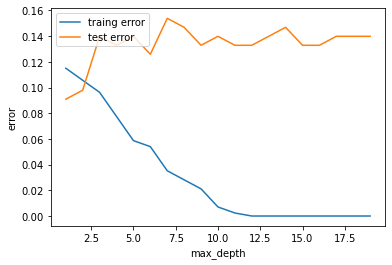

In [12]:
# The higher value of maximum depth causes overfitting, and a lower value causes underfitting
column_names = ['max_depth', 'train_error', 'test_error', 'accuracy']
del df
df = pd.DataFrame(columns = column_names)

acc_best = 0
md_best = 0

for md in range(1, 20):
    clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=md)
    clf = clf.fit(X_train, y_train)
    
    acc_test = accuracy_score(y_test, clf.predict(X_test))
    train_error = loss_func(y_train, clf.predict(X_train))
    test_error = loss_func(y_test, clf.predict(X_test))

    if (acc_test > acc_best) :
        acc_best = acc_test
        clf_regularized = clf
        md_best = md
        
    df.loc[len(df.index)] = [md, train_error, test_error, acc_test]
print(df)
print(f"The best depth is: {md_best} with an accuracy: {acc_best}")

plt.clf()
plt.plot(df.max_depth, df.train_error, label='traing error')
plt.plot(df.max_depth, df.test_error, label='test error')
plt.legend(loc="upper left")
plt.xlabel('max_depth')
plt.ylabel('error')

plt.show()

### Part (c): Visualizing your results

The function `plot_regions` will plot the decision regions of a trained decision tree `h` on the breast cancer data. Run it on your tree from part (a) and the best regularized tree from (b).

In [13]:
def plot_regions(h):
    plot_colors = ['yellow', 'purple']
    plot_step = 0.02
    
    breast_cancer = load_breast_cancer()
    X = breast_cancer.data
    y = breast_cancer.target
    
    #plt.clf()
    idx = np.arange(X.shape[0])
    
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    
    x_min , x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min , y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step ))
    
    Z = h.predict(np.c_[xx.ravel(), yy.ravel ()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx , yy , Z, cmap=plt.cm.Paired)
    
    plt.xlabel(breast_cancer.feature_names [0])
    plt.ylabel(breast_cancer.feature_names [1])
    plt.axis("tight")
    for i, color in zip(range(2),  plot_colors ):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    label=breast_cancer.target_names[i],
                    cmap=plt.cm.Paired)

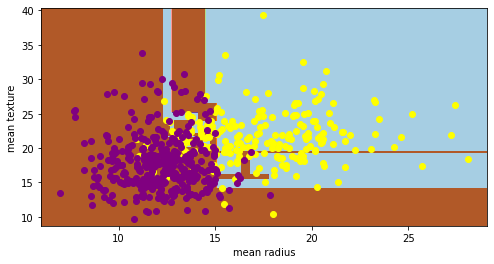

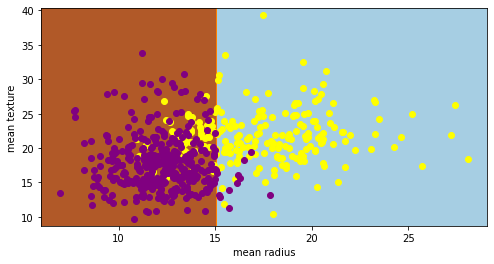

In [14]:
plt.figure(figsize=(8, 4))
plot_regions(clf_unregularized)
plt.figure(figsize=(8, 4))
plot_regions(clf_regularized)

### Part (d)

Now using `sklearn.ensemble.RandomForestClassifier`, train a random forest on the training data and report training and testing accuracy. Do this for varying number of trees by adjusting the parameter `n_estimators` and varying values of `max_depth` and report your findings. Is the best value of `max_depth` for a single tree also the best value for a random forest?

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Varying number of n_estimators
estimator_values = [1, 5, 10, 50, 80, 90, 100, 110, 120, 200]
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

acc_test_best = 0
acc_train_best = 0
est_best = 0
md_best = 0

for est in estimator_values:
    clf = RandomForestClassifier(n_estimators=est)
    clf = clf.fit(X_train, y_train)
    
    # Varying values of max_depth
    for md in max_depth_values:
        clf = RandomForestClassifier(max_depth=md)
        clf = clf.fit(X_train, y_train)
    
        acc_test = accuracy_score(y_test, clf.predict(X_test))
        acc_train = accuracy_score(y_train, clf.predict(X_train))
    
        if (acc_test > acc_test_best) :
            acc_test_best = acc_test
            acc_train_best = acc_train
            est_best = est
            md_best = md
        
print(f"The best estimator: {est_best} and max_depth: {md_best} with an test accuracy: {acc_test_best} and training accuracy: {acc_train_best}")

The best estimator: 200 and max_depth: 5 with an test accuracy: 0.9230769230769231 and training accuracy: 0.9436619718309859
